In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from sktime.datasets import load_from_tsfile

from preprocessing import get_paths, read_univariate_ts, TargetEncoder, stretch_interpolate_matrix, sample_rows

In [2]:
paths = get_paths()

Number of classes:

In [3]:
sum(len(np.unique(load_from_tsfile(path)[1])) for path in get_paths())

1118

Distribution of lengths of the series.

In [4]:
lengths_of_datasets =[]
for path in paths:
    X, _ = load_from_tsfile(path)
    lengths_of_datasets += X.applymap(len).values.reshape(-1).tolist() 

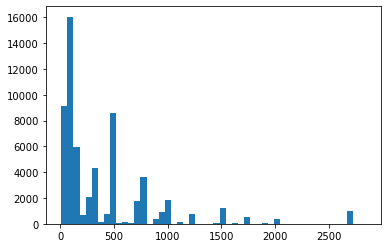

In [5]:
_=plt.hist(lengths_of_datasets, bins=50)

Number of observations per dataset:

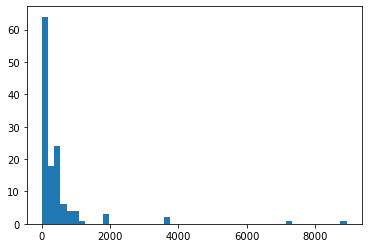

In [6]:
rows_per_dataset = [read_univariate_ts(path)[0].shape[0] for path in paths]
_ = plt.hist(rows_per_dataset, bins=50)

Number of observations per class:

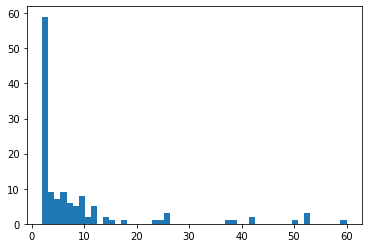

In [7]:
rows_per_class = [len(np.unique(read_univariate_ts(path)[1])) for path in paths]
_ = plt.hist(rows_per_class, bins=50)

# Sample series

In [8]:
def plot(dataset_name):
    X, y = read_univariate_ts(f'data/ts/{dataset_name}/{dataset_name}_TRAIN.ts')  
    X, y = sample_rows(X, y, n=200)
    X = stretch_interpolate_matrix(X, 100)
    color = TargetEncoder(y).get_0_1_scaled()
    plt.figure(figsize=(15, 15))
    for i in range(len(X)):
        plt.plot(X[i, :], c=plt.cm.rainbow(color[i]))

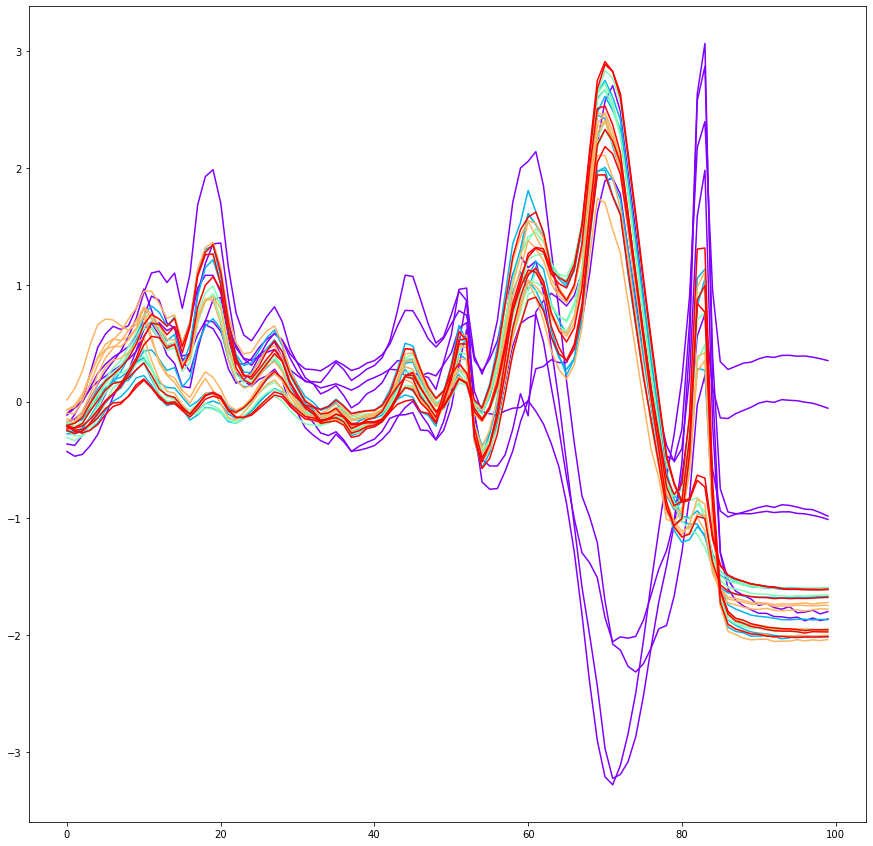

In [9]:
dataset_name = 'Beef'
plot(dataset_name)

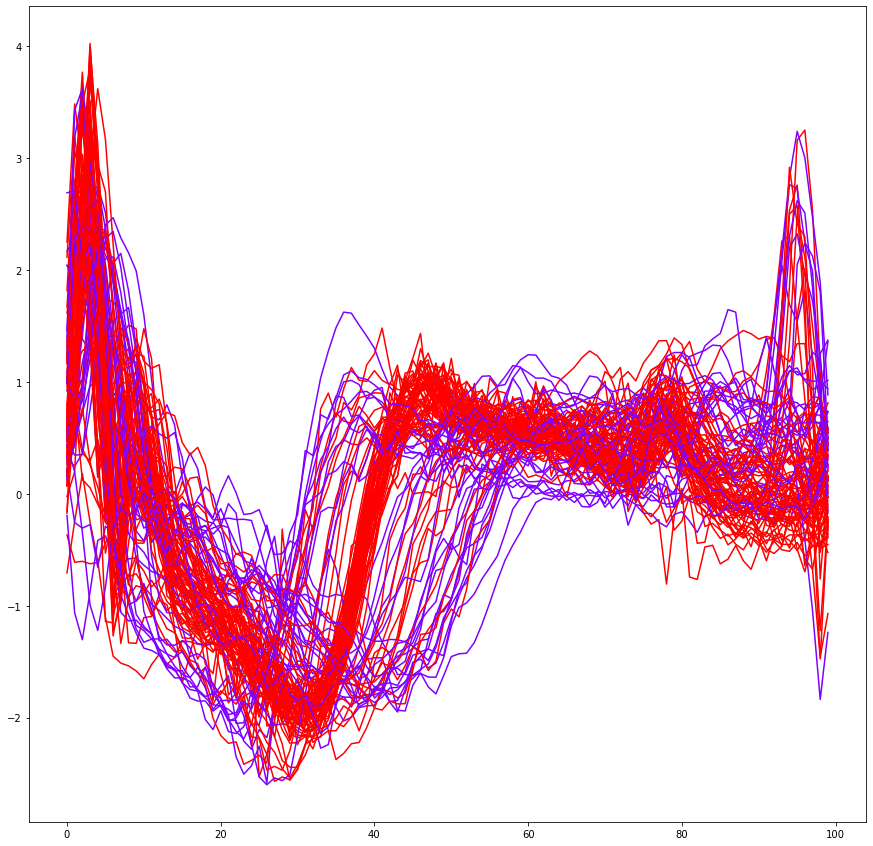

In [10]:
dataset_name = 'ECG200'
plot(dataset_name)

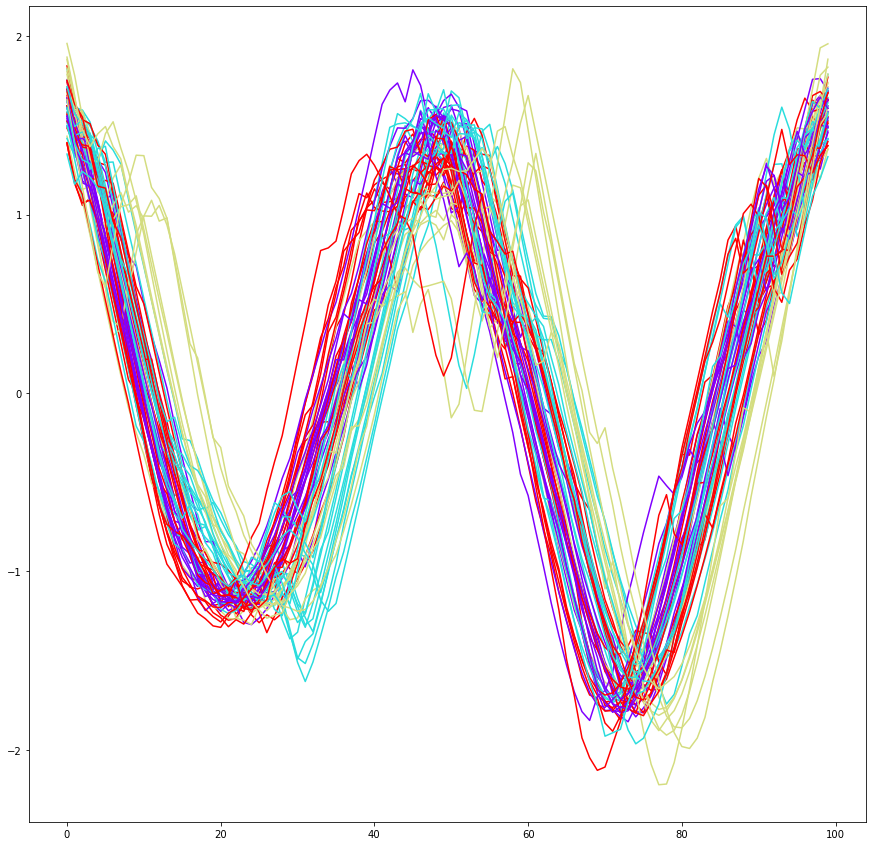

In [11]:
dataset_name = 'Car'
plot(dataset_name)

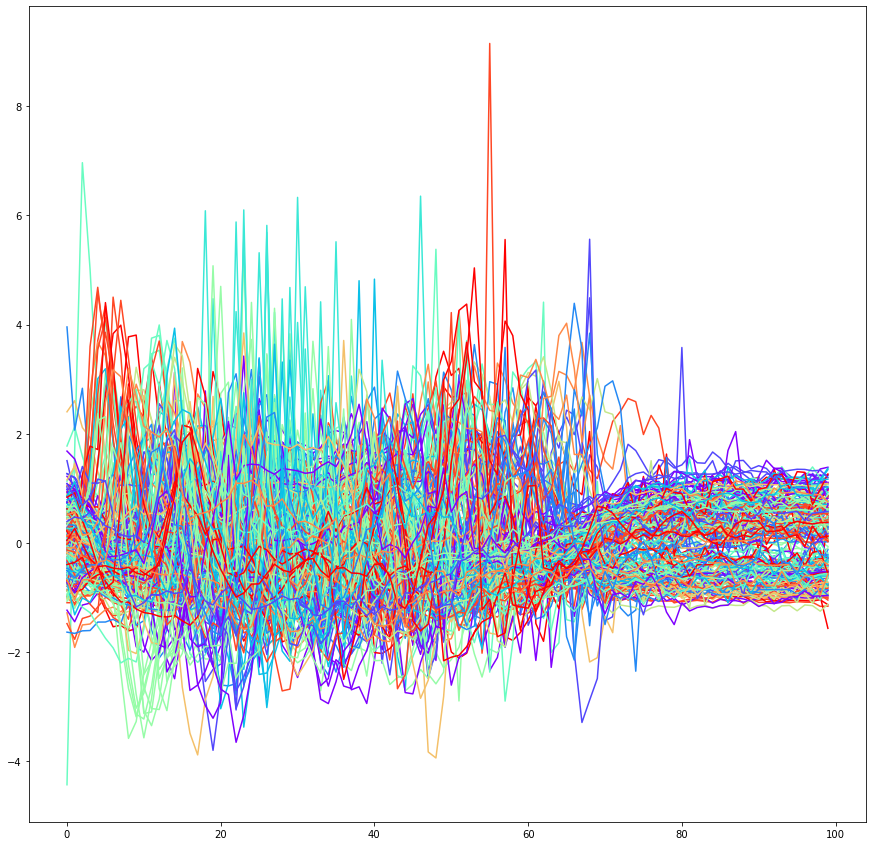

In [12]:
dataset_name = 'CricketX'
plot(dataset_name)

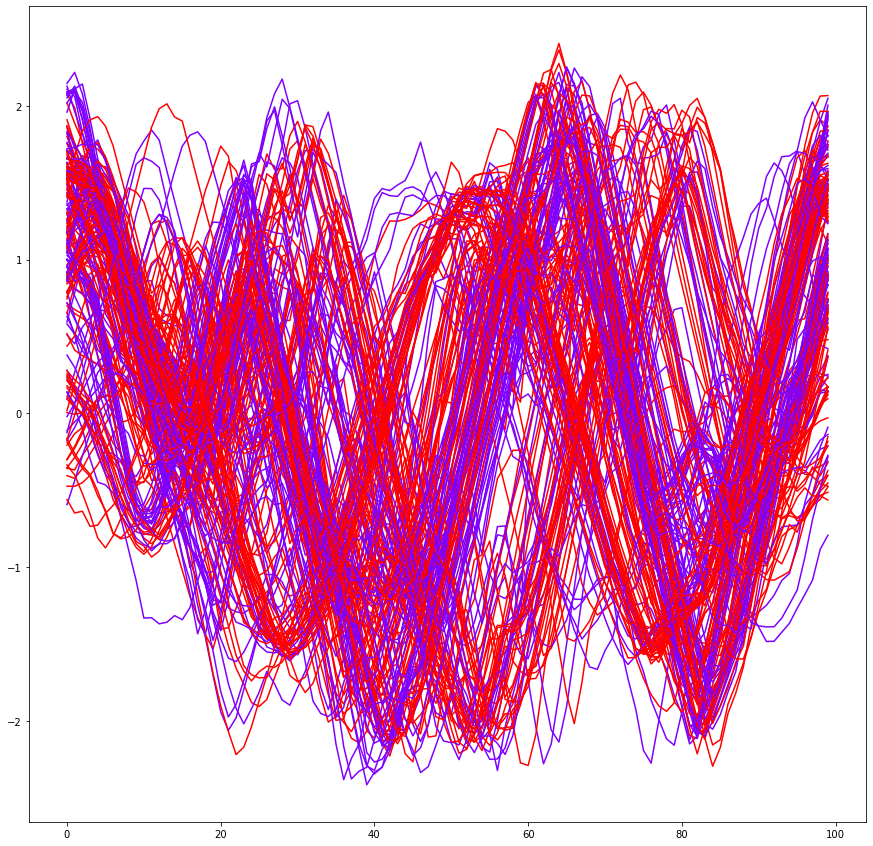

In [13]:
dataset_name = 'Yoga'
plot(dataset_name)